# Exploratory Data Analysis

**Ziele**:
- Daten verstehen
- Eventuelle Probleme identifizieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer


import re
import os
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 18 

[nltk_data] Downloading package punkt to /home/x/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Herunterladen der Datasets
Wir nutzen die Kaggle API um zwei Datensaetze herunterzuladen. Damit die Authentifizierung ohne Probleme funktioniert, muss zunaechst ein Kaggle Account angelegt werden und anschliessend ein enstprechender Access Token generiert werden. 

Datensaetze:
- McDonalds Reviews
- IMDB Reviews
- (Amazon Food Reviews)

**Wichtig:** Falls Google Colab genutzt wird, muss die `kaggle.json` (enthaelt die API credentials) hochgeladen werden. Andernfalls kann der naechste Schritt ubersprungen werden.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download McDonalds dataset
if not os.path.exists('mcdonalds-store-reviews.zip'):
    print("Downloading McDonalds dataset...")
    !kaggle datasets download -d nelgiriyewithana/mcdonalds-store-reviews
if os.path.exists('mcdonalds-store-reviews.zip'):
    print("Unzipping McDonalds dataset...")
    !unzip -n mcdonalds-store-reviews.zip

# Download IMDB dataset
if not os.path.exists('imdb-dataset-of-50k-movie-reviews.zip'):
    print("Downloading IMDB dataset...")
    !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
if os.path.exists('imdb-dataset-of-50k-movie-reviews.zip'):
    print("Unzipping IMDB dataset...")
    !unzip -n imdb-dataset-of-50k-movie-reviews.zip

### Zusaetzliches Datenset: Amazon Fine Food Reviews

In [ ]:
# Zusaetzliches Amazon Review Daa
if not os.path.exists('amazon-fine-food-reviews.zip'):  
    print("Downloading Amazon dataset...")
    !kaggle datasets download -d snap/amazon-fine-food-reviews
if os.path.exists('amazon-fine-food-reviews.zip'):  
    print("Unzipping Amazon dataset...")
    !unzip -n amazon-fine-food-reviews.zip

## Laden der Datensaetze

In [4]:
df_mcd = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')
df_imdb = pd.read_csv('IMDB Dataset.csv')
df_amazon = pd.read_csv('Reviews.csv')

## Erster Ueberblick 

**McDonalds Reviews**

In [5]:
df_mcd.head()   

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


**IMDB Reviews**

In [6]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**(Amazon Fine Food Reviews)**

In [7]:
df_amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Neben Reviewtexten und Bewertungen sind in den Datensaetzen einige weitere Daten enthalten. Da wir folgend nur an den Textdaten und dessen Bewertung interessiert sind, koennen wir diese herausziehen.

In [8]:
# Only keep the text and the sentiment
df_mcd = df_mcd[['review', 'rating']]
df_imdb = df_imdb[['review', 'sentiment']]  
df_amazon = df_amazon[['Text', 'Score']]

Ebenfalls koennen wir sehen, dass die Label 'categorical' sind und in form eines strings vorliegen. Um die Label besser verwenden zu koennen werden diese zunaechst in ein numerisches Format umgewandelt. Fuer das Imdb Dataset wird `positive` zu `1` und `negative` zu `0`. Selbes bei den McDonald Reviews, `1 star` entspricht `1` und `5 stars` entspricht `5`. (Im Fall des Amazon Datasets entspricht der 'Score' bereits einem integer Datentypen.)

Grundsaetzlich laesst sich bereits sagen, dass die Klassifizierungsprobleme hier einmal eine 'Binary Classification' und einmal eine 'Multi-Class Classification' sind. Fuer die Visualiserung ist dieses zunaechst kein Problem, allerdings muss bei einer spaeteren Zusammenfuerhung beachtet werden inwiefern die kategorialen daten entweder zu positv (1) oder negativ (0) umgewandelt werden.

In [9]:
mcd_rating_map = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5,
}
df_mcd['rating'] = df_mcd['rating'].map(mcd_rating_map)
df_imdb['sentiment'] = df_imdb['sentiment'].map({'positive': 1, 'negative': 0})

# Align column names
df_mcd = df_mcd.rename(columns={'review': 'text', 'rating': 'sentiment'})
df_amazon = df_amazon.rename(columns={'Text': 'text', 'Score': 'sentiment'})
df_imdb = df_imdb.rename(columns={'review': 'text', 'sentiment': 'sentiment'})

Das McDonalds und Amazon Dataset haben nachwievor kategorial gelabelte Reviews 1-5, das IMDB Dataset hingegen hat nur binary label mit 0-1. 

In [10]:
df_mcd.head()   

,text,sentiment
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [11]:
df_mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       33396 non-null  object
 1   sentiment  33396 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 521.9+ KB


In [12]:
df_imdb.head(5) 

,text,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [14]:
df_amazon.head()

,text,sentiment
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [15]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       568454 non-null  object
 1   sentiment  568454 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


### Anzal der Eintraege

In [16]:
print("McDonalds dataset has {} entries".format(len(df_mcd)))
for i in range(1, 6):
    print("McDonalds dataset has {} entries with {} stars".format(len(df_mcd[df_mcd['sentiment'] == i]), i))

print('-' * 50)

print("IMDB dataset has {} entries".format(len(df_imdb)))
for i in range(0, 2):
    print("IMDB dataset has {} entries with {} sentiment".format(len(df_imdb[df_imdb['sentiment'] == i]), 'positive' if i == 1 else 'negative'))

print('-' * 50)

print("Amazon dataset has {} entries".format(len(df_amazon)))
for i in range(1, 6):
    print("Amazon dataset has {} entries with {} stars".format(len(df_amazon[df_amazon['sentiment'] == i]), i))


McDonalds dataset has 33396 entries
McDonalds dataset has 9431 entries with 1 stars
McDonalds dataset has 3086 entries with 2 stars
McDonalds dataset has 4818 entries with 3 stars
McDonalds dataset has 5787 entries with 4 stars
McDonalds dataset has 10274 entries with 5 stars
--------------------------------------------------
IMDB dataset has 50000 entries
IMDB dataset has 25000 entries with negative sentiment
IMDB dataset has 25000 entries with positive sentiment
--------------------------------------------------
Amazon dataset has 568454 entries
Amazon dataset has 52268 entries with 1 stars
Amazon dataset has 29769 entries with 2 stars
Amazon dataset has 42640 entries with 3 stars
Amazon dataset has 80655 entries with 4 stars
Amazon dataset has 363122 entries with 5 stars


## Rating / Sentiment Verteilung

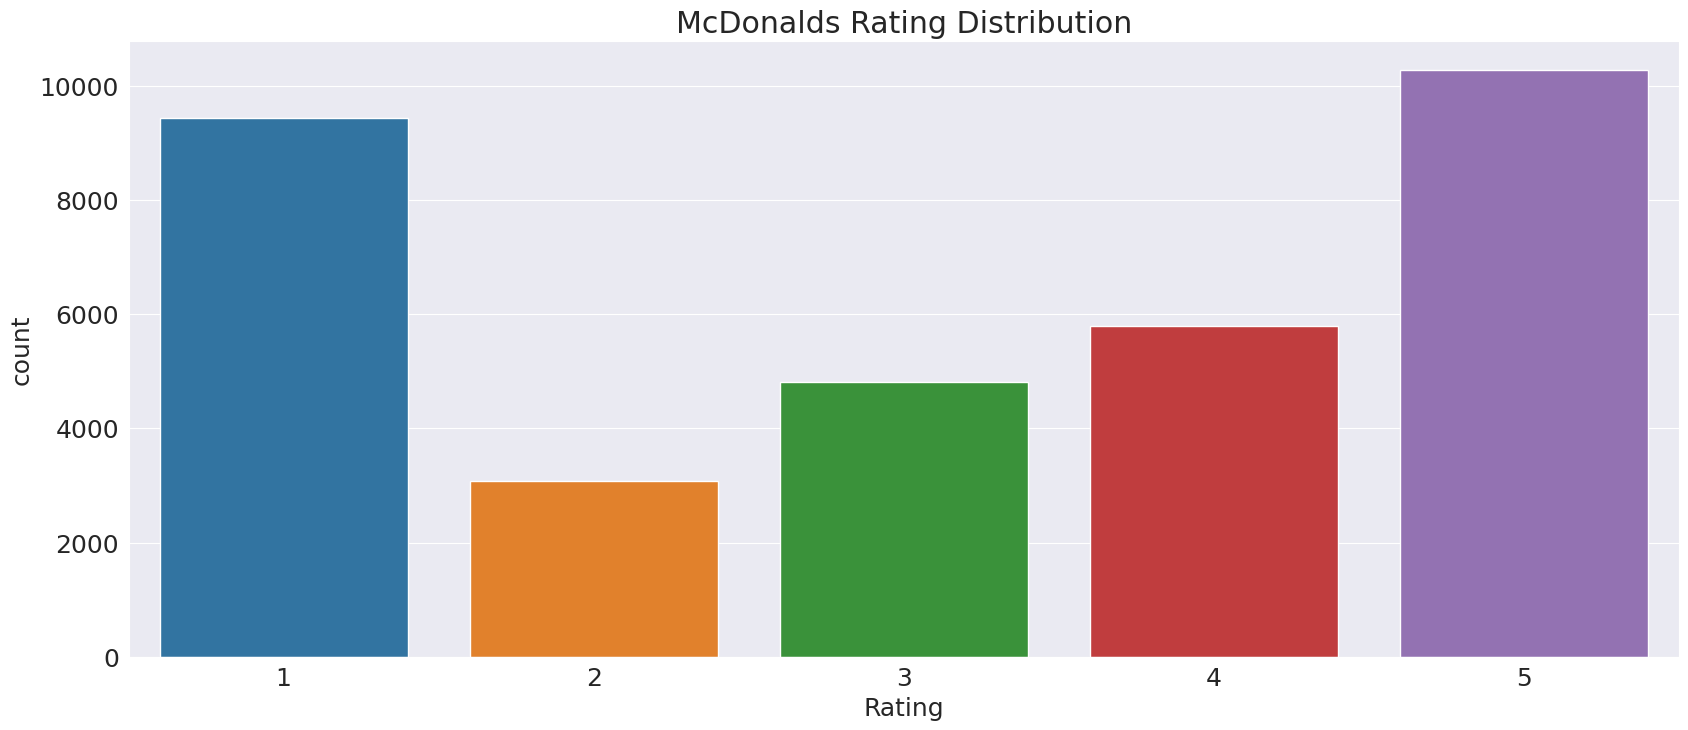

In [17]:
sns.countplot(x='sentiment', data=df_mcd)
plt.title('McDonalds Rating Distribution')
plt.xlabel('Rating')
plt.show()

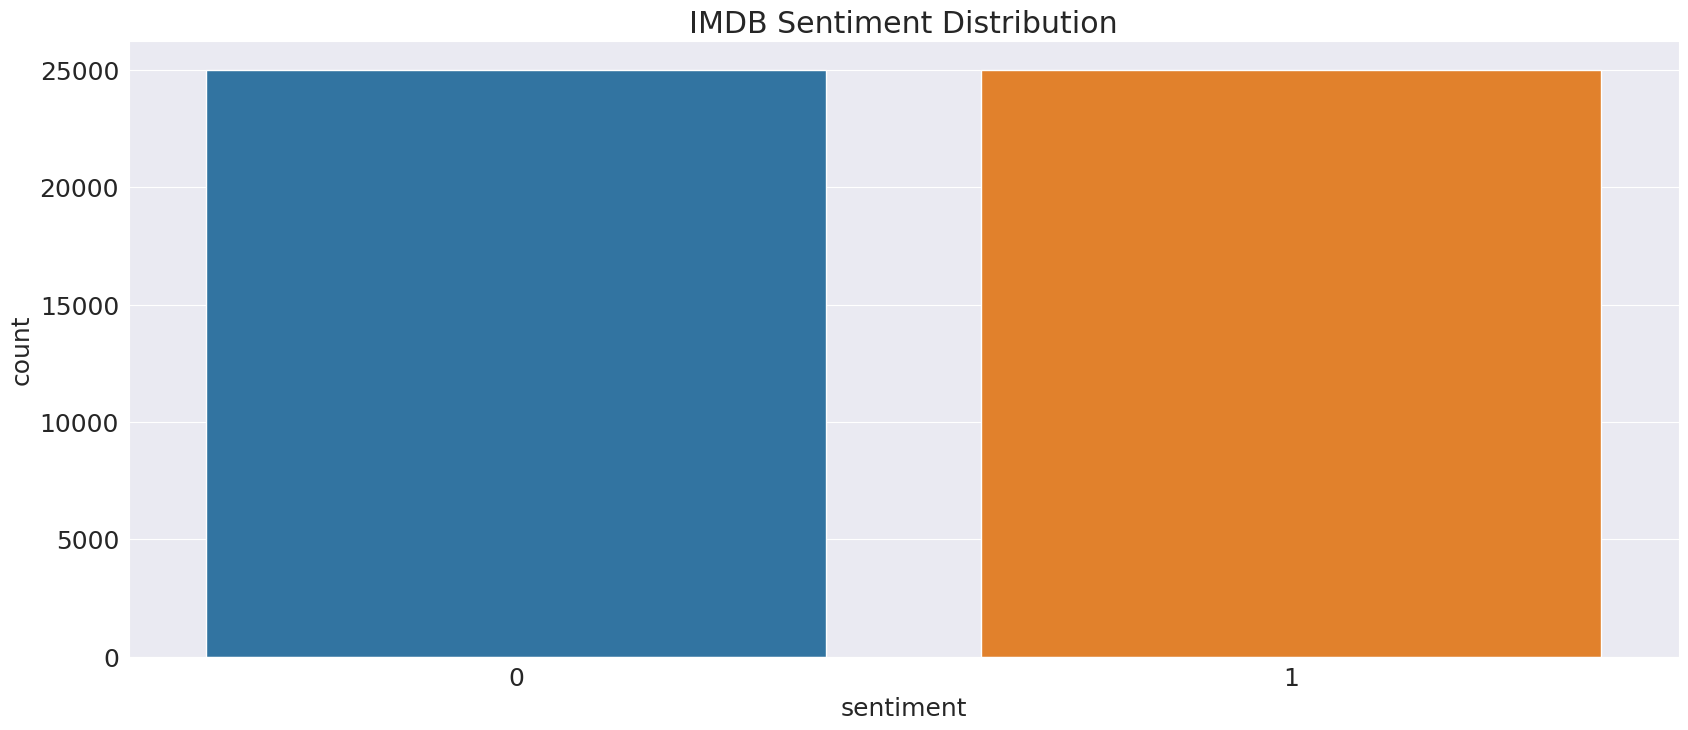

In [18]:
# IMDB Sentiment Distribution
sns.countplot(x='sentiment', data=df_imdb)
plt.title('IMDB Sentiment Distribution')    
plt.show()

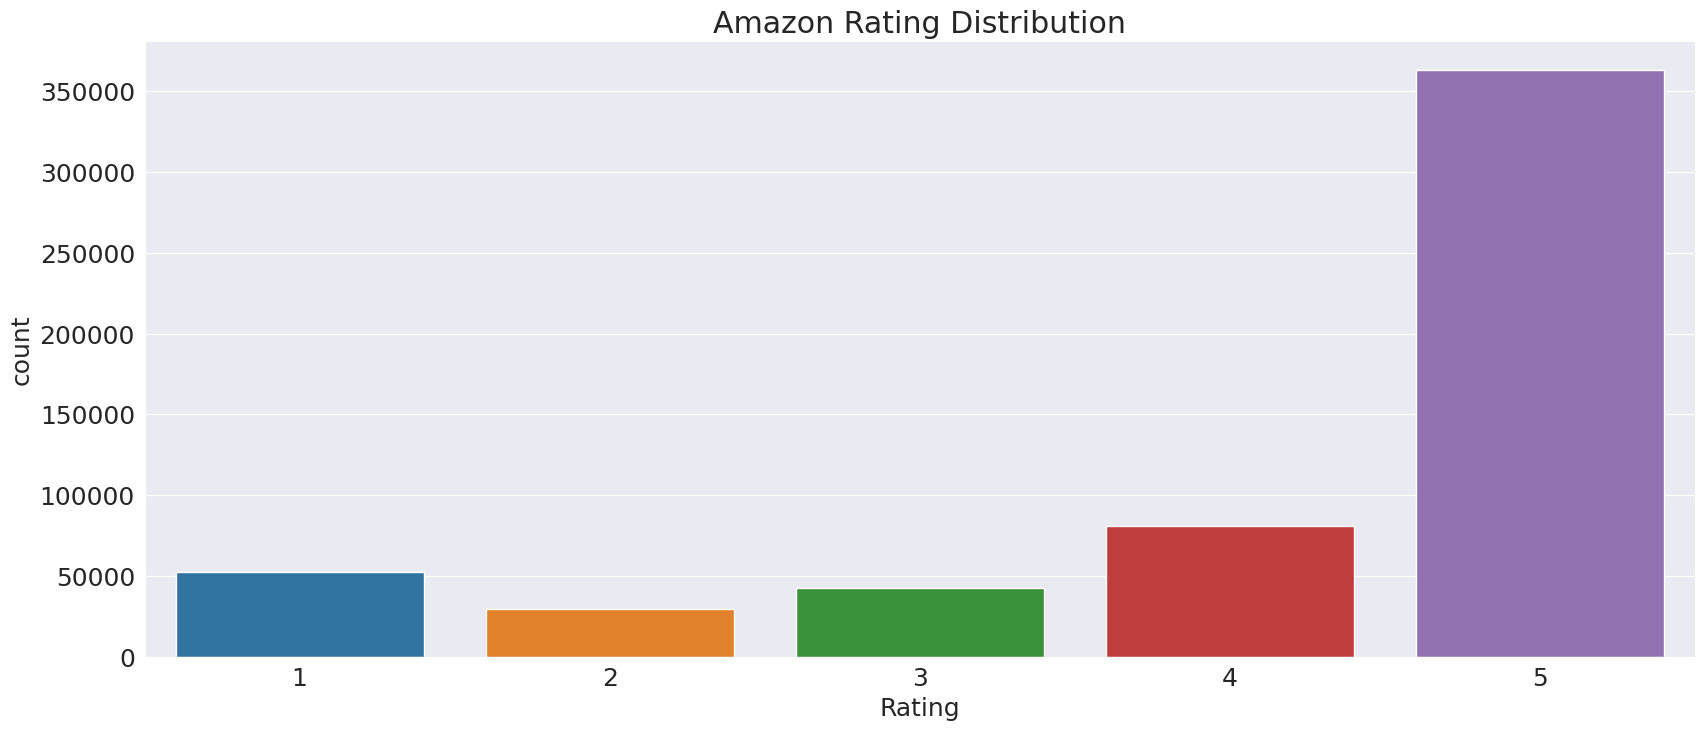

In [19]:
# Amazon Rating Distribution
sns.countplot(x='sentiment', data=df_amazon)
plt.title('Amazon Rating Distribution')
plt.xlabel('Rating')
plt.show()

## Genauere Betrachtung das McDonalds Datasets

- Charakteranzahl pro Kategorie
- Wortanzahl pro Kategorie 
- Durschnittliche Wortlaenge pro Kategorie
- Durchschnittliche Satzlaenge pro Kategorie 
- Meistvorkommende Woerter 

In [20]:
df_mcd['char_count'] = df_mcd['text'].apply(len)
df_mcd['word_count'] = df_mcd['text'].apply(lambda x: len(word_tokenize(x)))
df_mcd['mean_word_length'] = df_mcd['text'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))
df_mcd['sent_count'] = df_mcd['text'].apply(lambda x: len(sent_tokenize(x)))
df_mcd['mean_sent_length'] = df_mcd['word_count'] / df_mcd['sent_count']  
df_mcd.head()     

,text,sentiment,char_count,word_count,mean_word_length,sent_count,mean_sent_length
0,Why does it look like someone spit on my food?...,1,259,60,3.466667,3,20.0
1,It'd McDonalds. It is what it is as far as the...,4,237,49,4.000000,5,9.8
2,Made a mobile order got to the speaker and che...,1,415,74,4.662162,5,14.8
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,176,14,11.714286,2,7.0
4,"I repeat my order 3 times in the drive thru, a...",1,312,69,3.550725,2,34.5


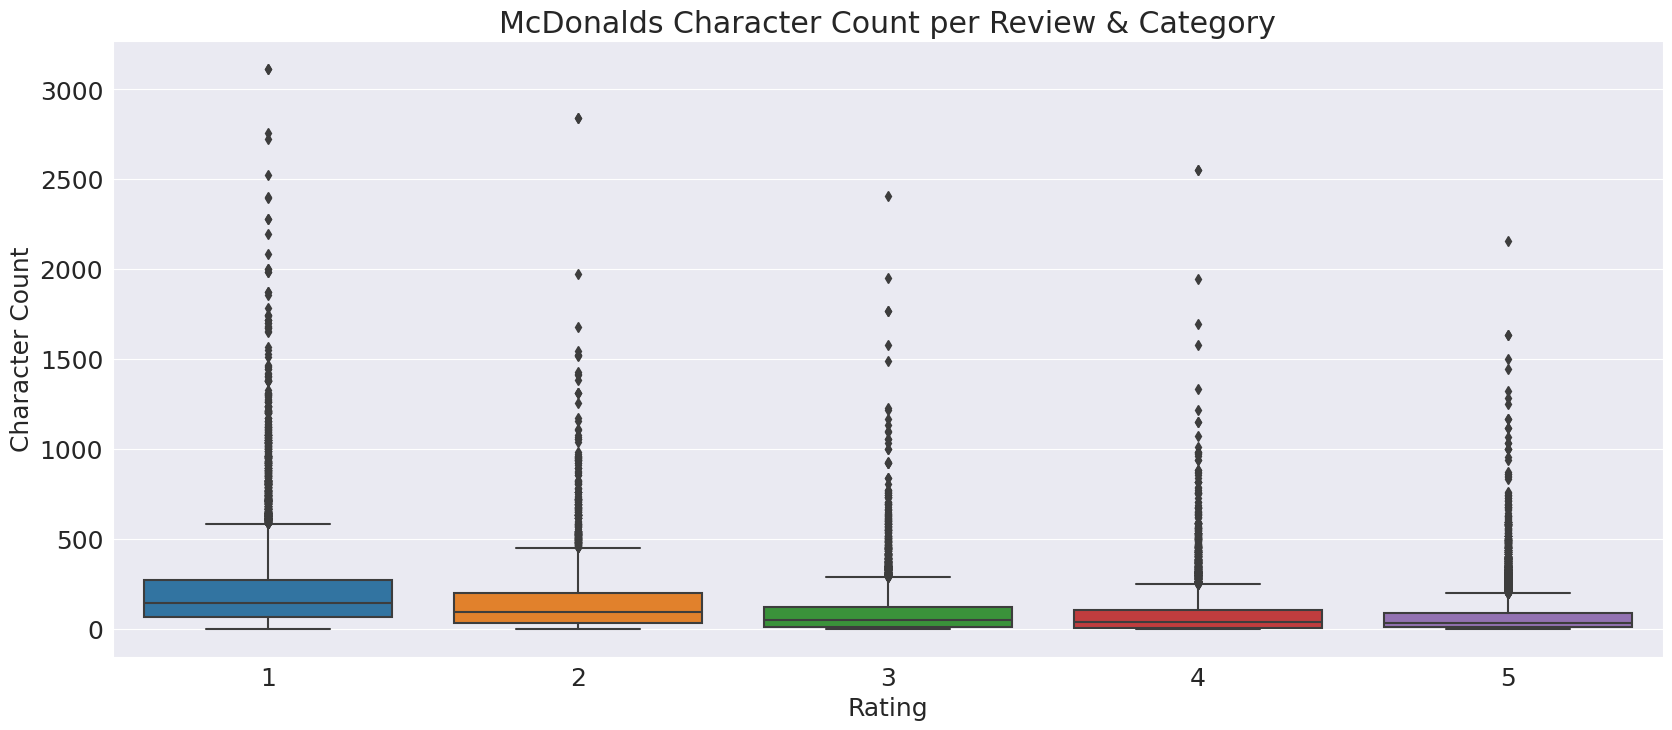

In [21]:
sns.boxplot(x='sentiment', y='char_count', data=df_mcd)
plt.title('McDonalds Character Count per Review & Category')
plt.xlabel('Rating')
plt.ylabel('Character Count')   
plt.show()

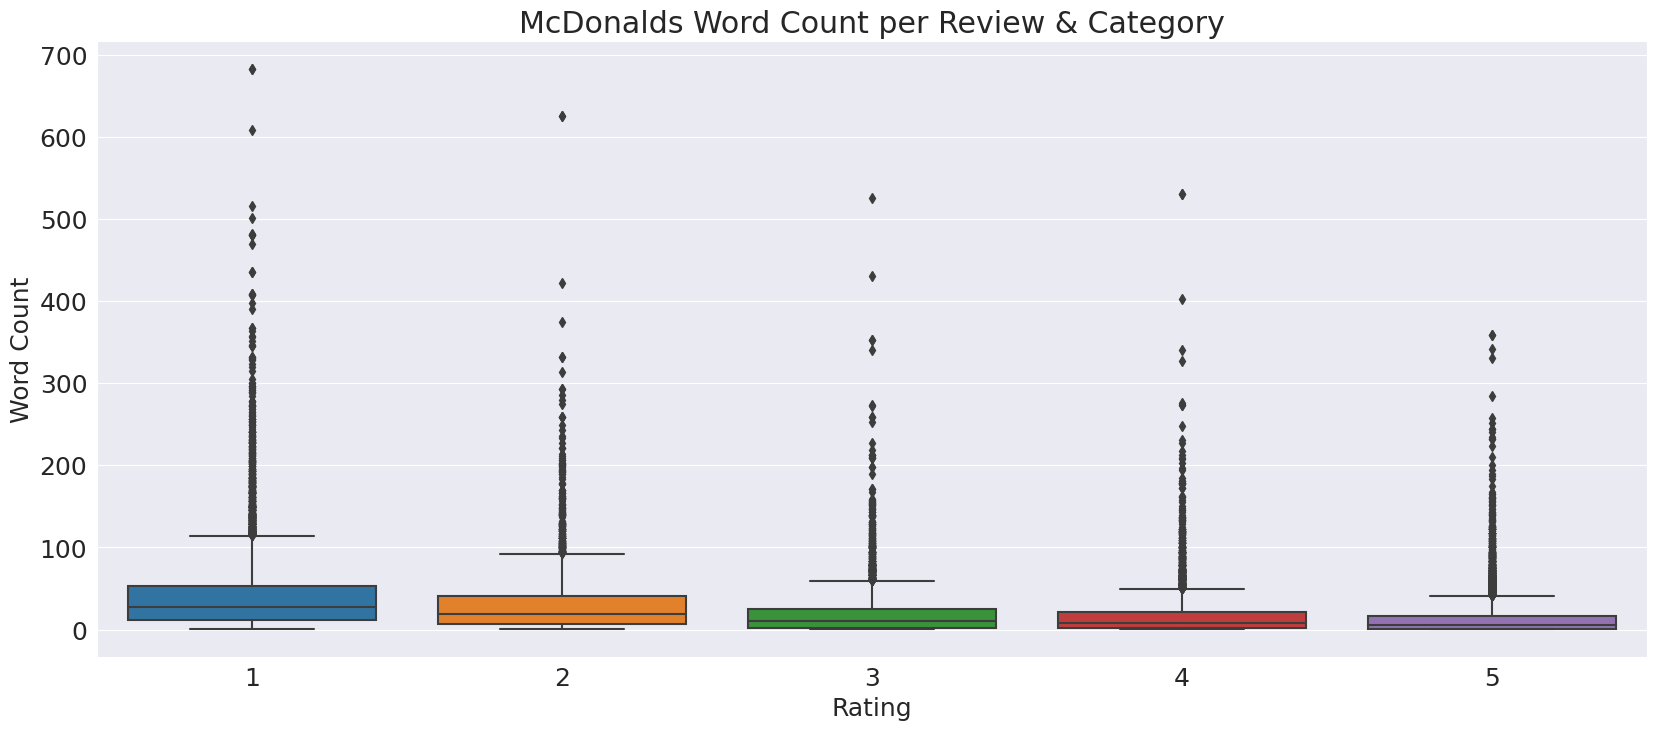

In [22]:
sns.boxplot(x='sentiment', y='word_count', data=df_mcd) 
plt.title('McDonalds Word Count per Review & Category')
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.show()

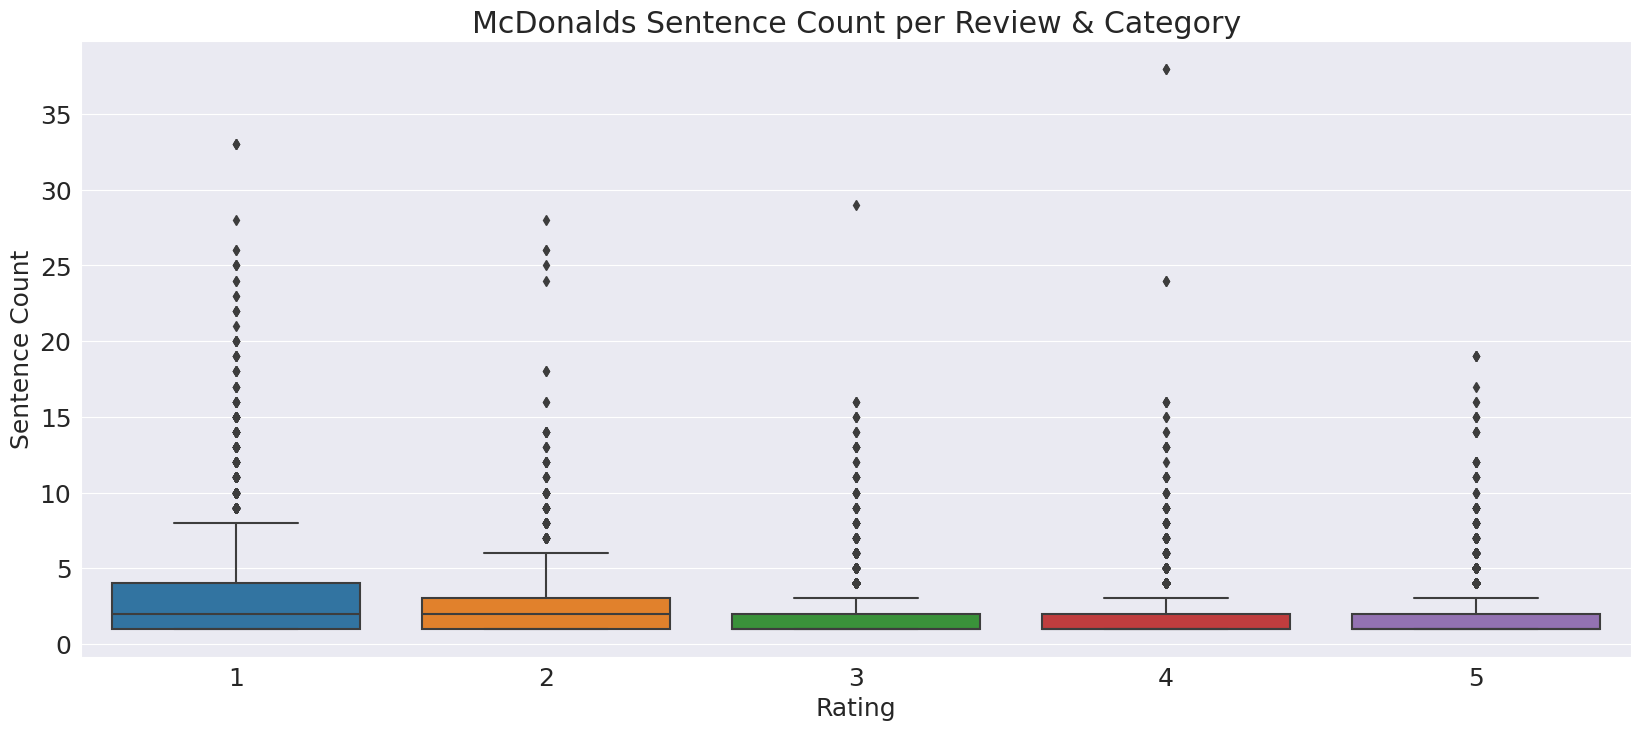

In [23]:
# sentence cound per review
sns.boxplot(x='sentiment', y='sent_count', data=df_mcd)
plt.title('McDonalds Sentence Count per Review & Category')
plt.xlabel('Rating')
plt.ylabel('Sentence Count')
plt.show()

In [24]:
df_mean_lengths = df_mcd.groupby('sentiment').agg({'mean_word_length': 'mean', 'mean_sent_length': 'mean'}).reset_index()

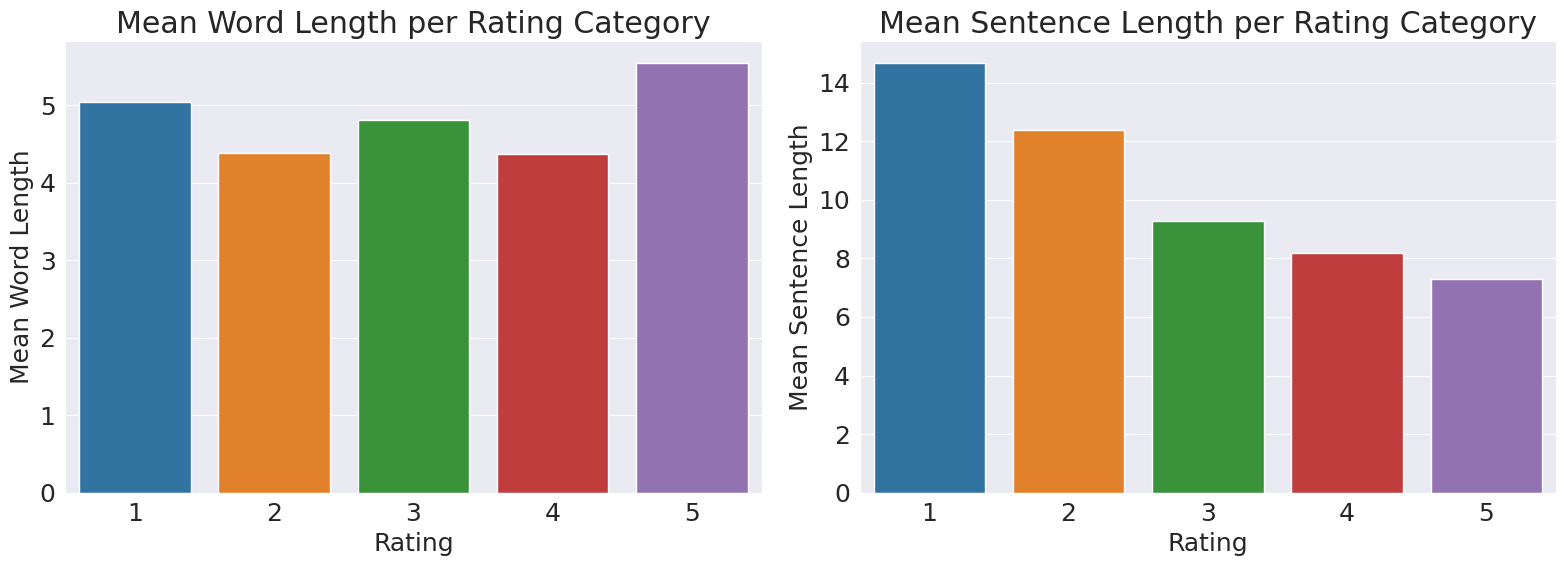

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Mean Word length
sns.barplot(x='sentiment', y='mean_word_length', data=df_mean_lengths, ax=axs[0])
axs[0].set_title('Mean Word Length per Rating Category')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Mean Word Length')

# Mean Sentence Length 
sns.barplot(x='sentiment', y='mean_sent_length', data=df_mean_lengths, ax=axs[1])
axs[1].set_title('Mean Sentence Length per Rating Category')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Mean Sentence Length')

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

Die vorhergehenden Plots zeigen relativ Interessante Dinge auf. Generell kann gesagt werden, dass schlechte Bewertungen tendenziell laenger sind und mehr Saetze enthalten. Dies deutet darauf hin, dass unzufriedene Kunden detailierteres Feedback geben. 

In [26]:
# Clean up added columns
df_mcd.drop(['char_count', 'word_count', 'mean_word_length', 'sent_count', 'mean_sent_length'], axis=1, inplace=True)
df_mcd.head()

,text,sentiment
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


## Haeufigkeit von Begriffen
Bevor wir die Haeufigkeit von Begriffen analysieren, ist es notwendig, die Datensaetze zu bereinigen, um valide Ergebnisse zu erzielen. Es ist wichtig, irrelevante Daten wie HTML-Tags und Zeichensetzung zu entfernen, da diese in der folgenden Analyse zu Verzerrungen fuehren koennen. Durch die Umwandlung aller Woerter in Kleinbuchstaben erreichen wir eine gewisse Standardisierung, die uns konsistentere Resultate liefert. Zudem erlaubt das Entfernen von Stoppwoertern, die ueblicherweise wenig zur Information beitragen, die Konzentration auf wirklich relevante Begriffe. Dies stellt sicher, dass unsere Analyse praezise und informativ ist.

### Reinigen der Reviews

In [27]:
def clean_text(text):
    # Convert to lowercase
    test = text.lower()
    # Remove punctuation
    test = re.sub(r'[^a-z\s]', '', test)
    # Remove HTML Tags
    test = re.sub(r'<.*?>', '', test)
    # Remove stopwords
    test = ' '.join([word for word in word_tokenize(test) if word not in stopwords.words('english')])
    return test

Was hier sicherlich auch noch interessant waere ist 'Stemming' und 'Lemmatization'.
- Stemming: Reduziert Woerter auf ihre Basis, z.B. aus 'jumps', 'jumping', 'jumped' wird 'jump'
- Lemmatization: Reduziert Woerter auf ihre lexikalische Grundform, bietet hoehere semantische Genauigkeit als Stemming. 

In [28]:
og_text = df_mcd['text'][0]
df_mcd['text'] = df_mcd['text'].apply(clean_text)

print('Original Text: {}'.format(og_text))
print('Cleaned Text: {}'.format(df_mcd['text'][0]))

Original Text: Why does it look like someone spit on my food?
I had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.
Cleaned Text: look like someone spit food normal transaction everyone chill polite dont want eat im trying think milky whiteclear substance food sure coming back


In [29]:
df_mcd.head()

,text,sentiment
0,look like someone spit food normal transaction...,1
1,itd mcdonalds far food atmosphere go staff mak...,4
2,made mobile order got speaker checked line mov...,1
3,mc crispy chicken sandwich customer service qu...,5
4,repeat order times drive thru still manage mes...,1


### Anlegen eines Wort - Haeufigkeits Mappings (Aehnlich BoW)

In [30]:
df_mcd['word_list'] = df_mcd['text'].apply(lambda x: x.split())
df_mcd.head()

,text,sentiment,word_list
0,look like someone spit food normal transaction...,1,"[look, like, someone, spit, food, normal, tran..."
1,itd mcdonalds far food atmosphere go staff mak...,4,"[itd, mcdonalds, far, food, atmosphere, go, st..."
2,made mobile order got speaker checked line mov...,1,"[made, mobile, order, got, speaker, checked, l..."
3,mc crispy chicken sandwich customer service qu...,5,"[mc, crispy, chicken, sandwich, customer, serv..."
4,repeat order times drive thru still manage mes...,1,"[repeat, order, times, drive, thru, still, man..."


In [31]:
# Create a list of all words and the frequency of each word
word_list = []
for index, row in df_mcd.iterrows():
    word_list += row['word_list']

print('Total Words: {}'.format(len(word_list)))
most_common_words = Counter(word_list).most_common(10)
print('Most Common Words: {}'.format(most_common_words))

# Could also use nltk.FreqDist
# word_freq = nltk.FreqDist(word_list)

Total Words: 384990
Most Common Words: [('food', 7782), ('service', 6193), ('mcdonalds', 6151), ('order', 6132), ('good', 5571), ('place', 3378), ('get', 3321), ('drive', 2827), ('one', 2727), ('fast', 2705)]


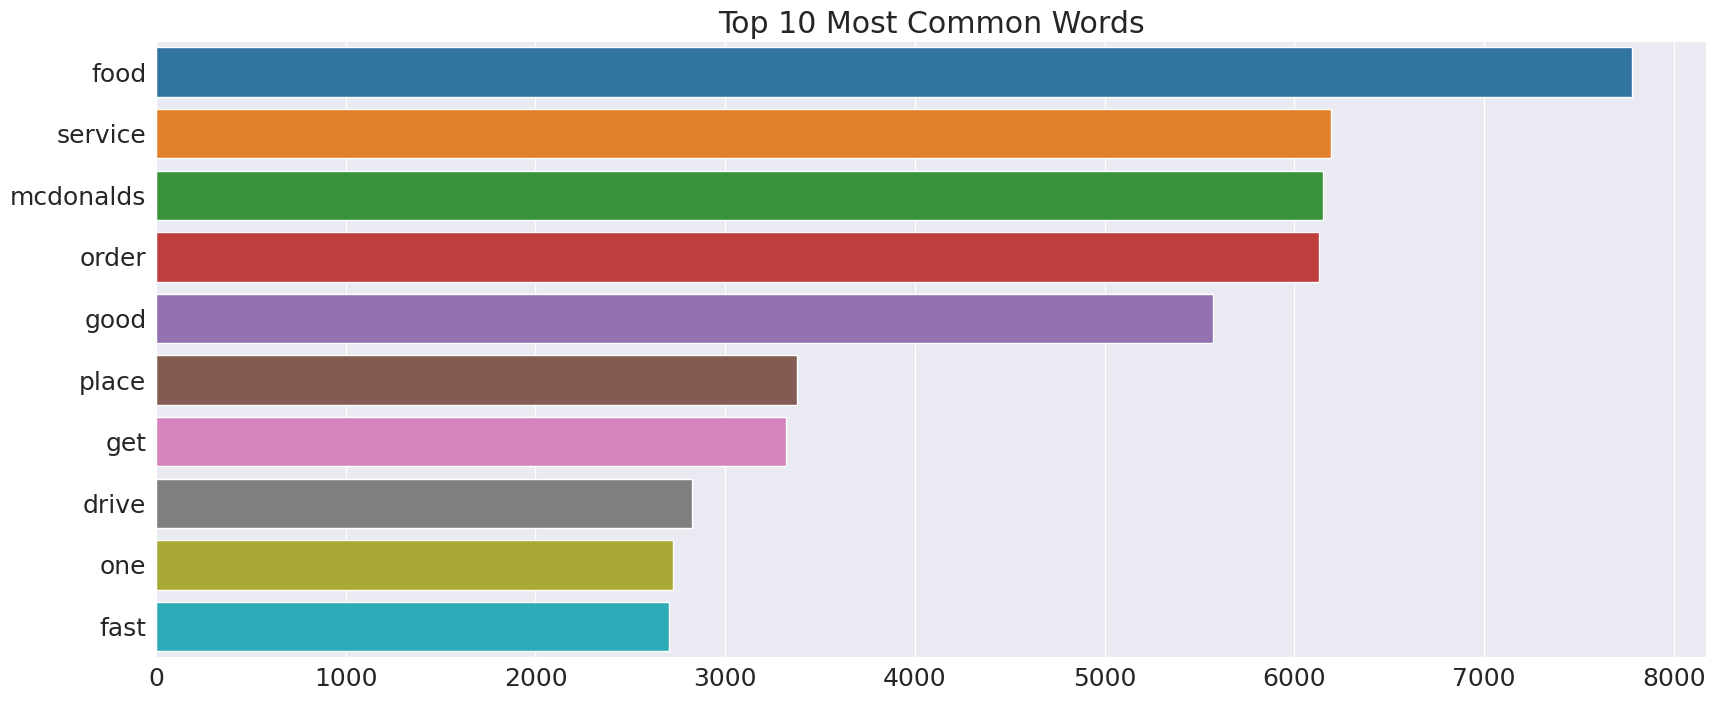

In [32]:
# Create a list for all words and a list for the frequencies
words = [word for word,_ in most_common_words]
freqs = [freq for _,freq in most_common_words]

# plot with seaborn
sns.barplot(x=freqs, y=words)
plt.title('Top 10 Most Common Words')
plt.show()

### Haeufigkeit von Bi-grammen
Woerter fuer sich alleine geben meistens nicht den gesamten Kontext wieder. Abhaengig von der Position im Satz koennen sie sogar komplett unterschiedliche Bedeutungen haben. Mit der Betrachtung der Bi-Grams koennen wir ein besseres Verstaendnis fuer den Kontext bekommen, in dem Worte verwendet werden. Des Weiteren hilft diese Analyse gaengige Phrasen und Ausdruecke zu identifizieren, welche haeufig in Reviews verwendet werden, z.B. 'good service', 'cold food' etc.

In [33]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_mcd['text'])

print('Total Bigrams: {}'.format(bigrams.shape[1]))
print('Shape: {}'.format(bigrams.shape))       

Total Bigrams: 156641
Shape: (33396, 156641)


In [34]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

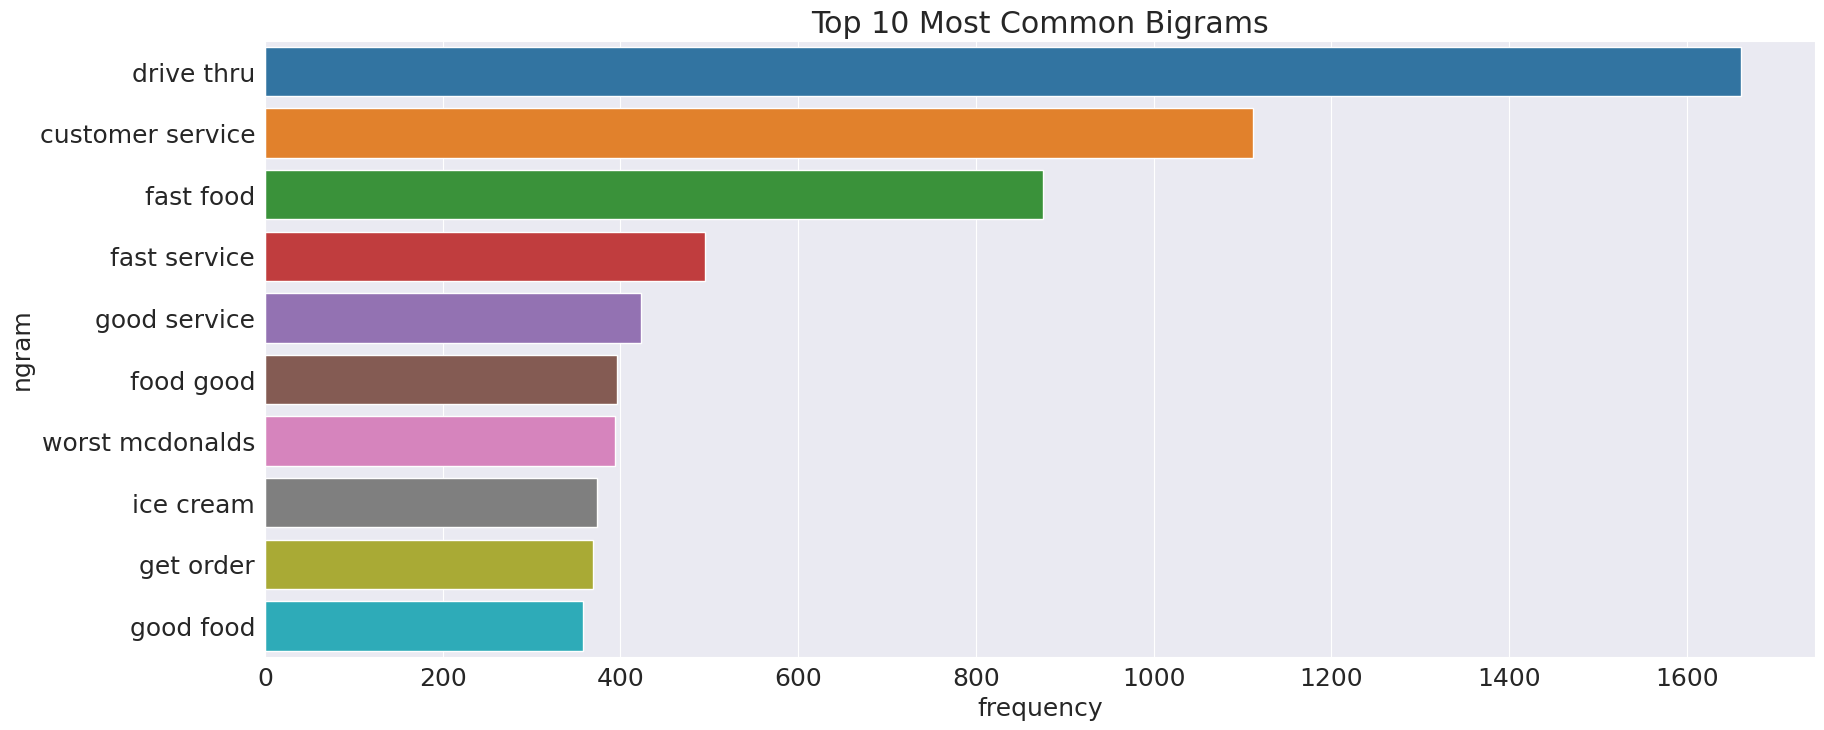

In [35]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Common Bigrams')
plt.show()

Bis auf 'worst mcdonalds' scheinen die Bi-Grams entweder positiv, oder nichts-aussagend zu sein. Hier fehlt uns oft ein weiteres Wort um z.B. bei 'customer service', um eine Bewertung ueber das Sentiment machen zu koennen. Hier waere es interessant zu schauen inwiefern sich die haeufigsten Woerter und BiGramme zwischen negativen und postiven reviews unterscheiden.

### Auftrennung in 'positive' und 'negative' reviews

Da die Labels des McDonalds Datensatzes 'multiclass' sind, muss zunaechst eine Entscheidung getroffen werden, welche Reviews 'postiv' und welche 'negativ' sind. Der Einfachheit halber haben wir uns fuer folgende Aufteilung entschieden:
- Ratings <= 3 sind negativ
- Ratings > 3 sind positiv

In [36]:
df_mcd['sentiment'] = df_mcd['sentiment'].map(lambda x: 1 if x > 3 else 0)  
df_mcd.head()

,text,sentiment,word_list
0,look like someone spit food normal transaction...,0,"[look, like, someone, spit, food, normal, tran..."
1,itd mcdonalds far food atmosphere go staff mak...,1,"[itd, mcdonalds, far, food, atmosphere, go, st..."
2,made mobile order got speaker checked line mov...,0,"[made, mobile, order, got, speaker, checked, l..."
3,mc crispy chicken sandwich customer service qu...,1,"[mc, crispy, chicken, sandwich, customer, serv..."
4,repeat order times drive thru still manage mes...,0,"[repeat, order, times, drive, thru, still, man..."


In [37]:
negative_reviews = df_mcd[df_mcd['sentiment'] == 0]
positive_reviews = df_mcd[df_mcd['sentiment'] == 1]

print('Number of Negative Reviews: {}'.format(len(negative_reviews)))
print('Number of Positive Reviews: {}'.format(len(positive_reviews)))

Number of Negative Reviews: 17335
Number of Positive Reviews: 16061


In [38]:
# Create a list of all words and the frequency of each word for negative reviews and positive reviews
negative_word_list = []
for index, row in negative_reviews.iterrows():
    negative_word_list += row['word_list']

most_common_negative_words = Counter(negative_word_list).most_common(10)
neg_freqs = [freq for _,freq in most_common_negative_words]     
neg_words = [word for word,_ in most_common_negative_words]

positive_word_list = []
for index, row in positive_reviews.iterrows():
    positive_word_list += row['word_list']

most_common_positive_words = Counter(positive_word_list).most_common(10)
pos_freqs = [freq for _,freq in most_common_positive_words]
pos_words = [word for word,_ in most_common_positive_words]

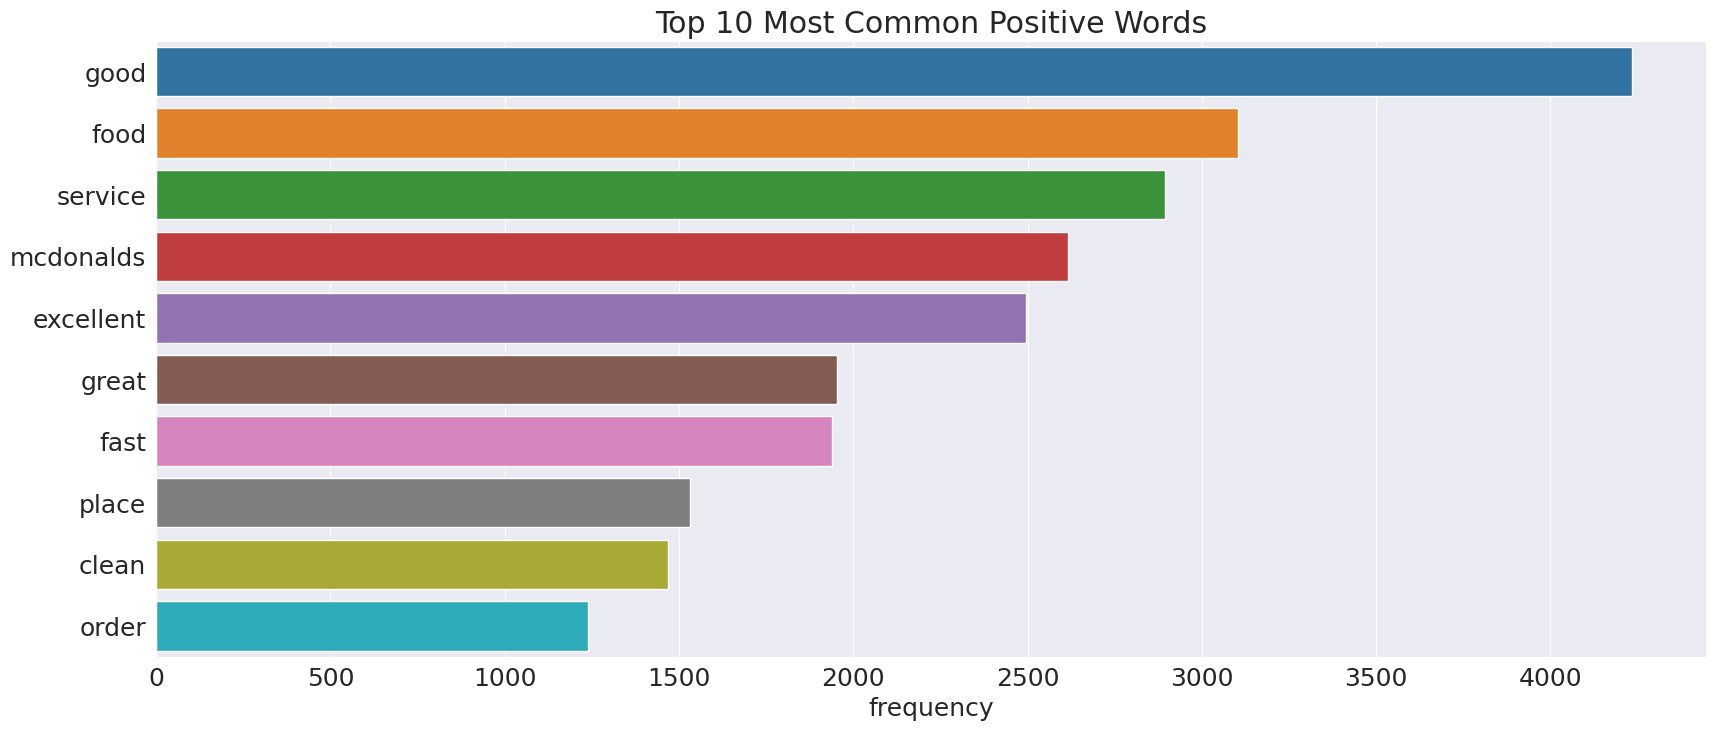

In [39]:
# plot with seaborn
sns.barplot(x=pos_freqs, y=pos_words)   
plt.title('Top 10 Most Common Positive Words')
plt.xlabel('frequency')
plt.show()

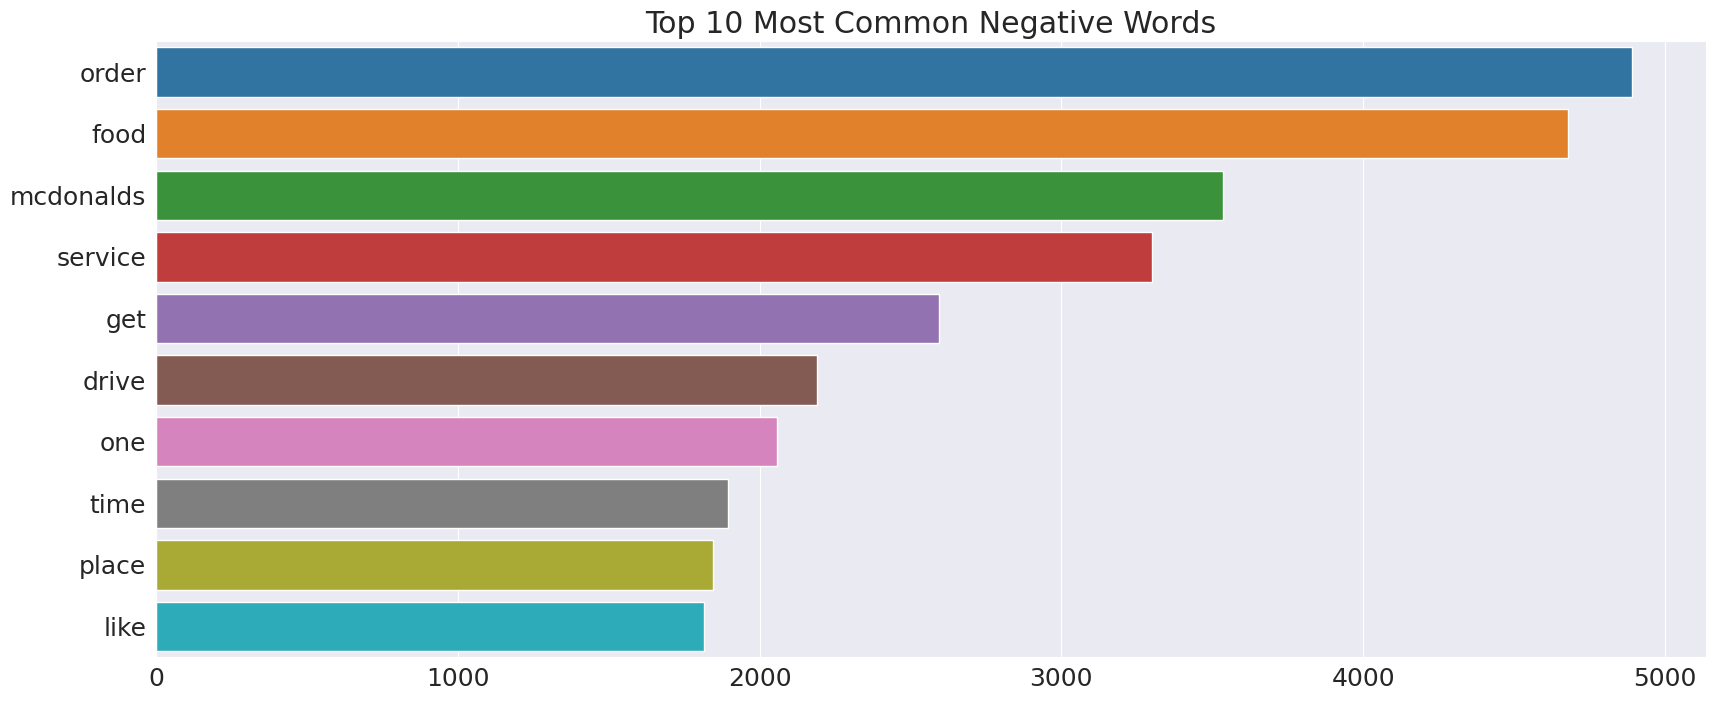

In [40]:
sns.barplot(x=neg_freqs, y=neg_words)
plt.title('Top 10 Most Common Negative Words')
plt.show()

In [41]:
cv_neg = CountVectorizer(ngram_range=(2,2))
bigrams_neg = cv_neg.fit_transform(negative_reviews['text'])

print('Negative - Total Bigrams: {}'.format(bigrams_neg.shape[1]))
print('Shape: {}'.format(bigrams_neg.shape))   

cv_pos = CountVectorizer(ngram_range=(2,2))
bigrams_pos = cv_pos.fit_transform(positive_reviews['text'])

print('Positive - Total Bigrams: {}'.format(bigrams_pos.shape[1]))
print('Shape: {}'.format(bigrams_pos.shape))    

Negative - Total Bigrams: 117255
Shape: (17335, 117255)
Positive - Total Bigrams: 52423
Shape: (16061, 52423)


In [42]:
count_values_neg = bigrams_neg.toarray().sum(axis=0)
ngram_freq_neg = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv_neg.vocabulary_.items()], reverse = True))
ngram_freq_neg.columns = ["frequency", "ngram"]

count_values_pos = bigrams_pos.toarray().sum(axis=0)
ngram_freq_pos = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv_pos.vocabulary_.items()], reverse = True))
ngram_freq_pos.columns = ["frequency", "ngram"]

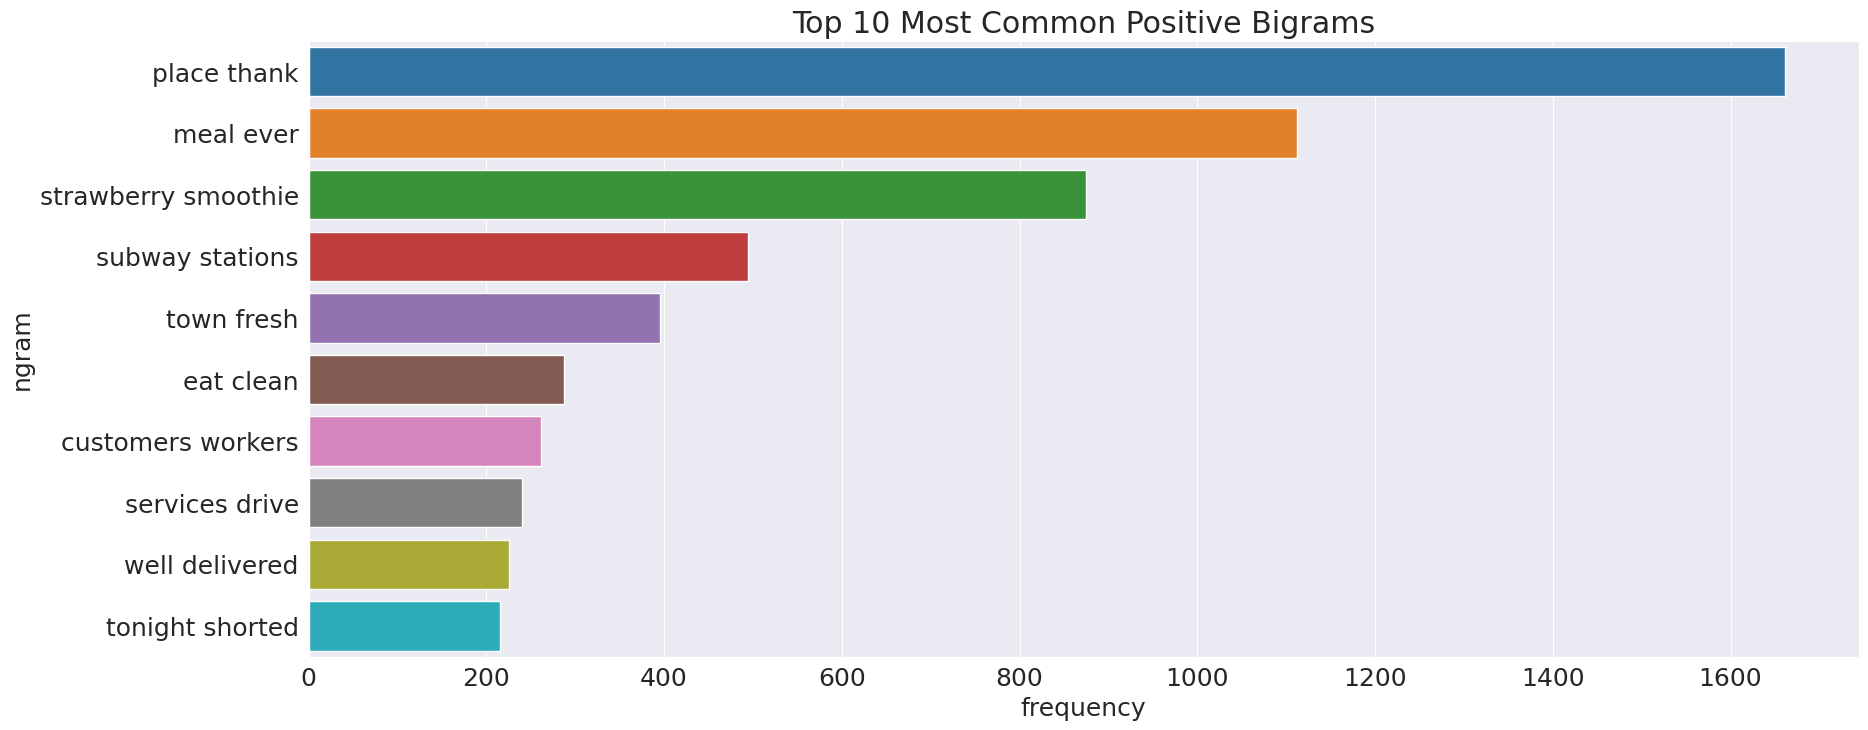

In [43]:
sns.barplot(x=ngram_freq_pos['frequency'][:10], y=ngram_freq_pos['ngram'][:10])
plt.title('Top 10 Most Common Positive Bigrams')
plt.show()

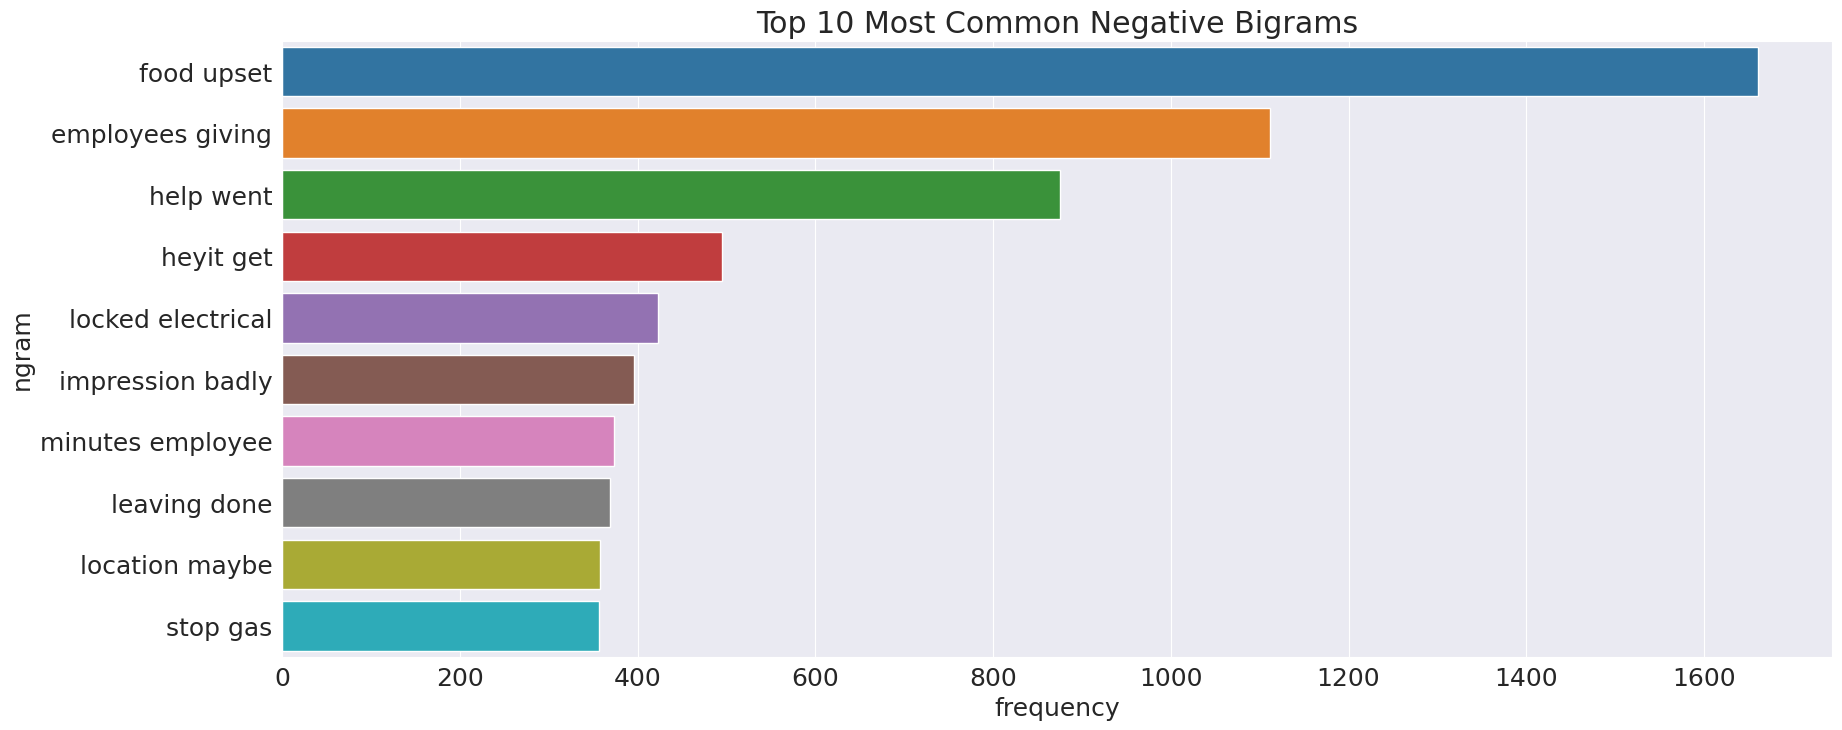

In [44]:
sns.barplot(x=ngram_freq_neg['frequency'][:10], y=ngram_freq_neg['ngram'][:10])
plt.title('Top 10 Most Common Negative Bigrams')
plt.show()